# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Understanding the structure of the data

In [2]:
data = pd.read_csv(r'C:\Users\USER\Desktop\Great Learning\Project\foodhub_order.csv')
df=data.copy() #To avoid any changes to original data
df1=data.copy()
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
df.shape # TO find the number of rows and columns

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the data set provided

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
df.info() # TO find data type of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- There are attributes of different types (int, float, object) in the data.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
df.isnull().sum() # To find is there columns with any missing values

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
df.describe(include='all').T # To find the statistical summary of all the columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
 - Food Preparation
     - Minimum time - 20 minutes
     - Average Time - 27.37 minutes
     - MAximum time - 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
df['rating'].value_counts() # To find the number of ratings

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
736 Orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Number of observations

In [8]:
# To find the number of unique observation in each column
print('Number of order id = ',df['order_id'].nunique())
print('\nNumber of customer id = ',df['customer_id'].nunique())
print('\nNumber of Restaurants = ',df['restaurant_name'].nunique())
print('\nNumber of Cuisine Type = ',df['cuisine_type'].nunique())

Number of order id =  1898

Number of customer id =  1200

Number of Restaurants =  178

Number of Cuisine Type =  14


### Cuisine Type

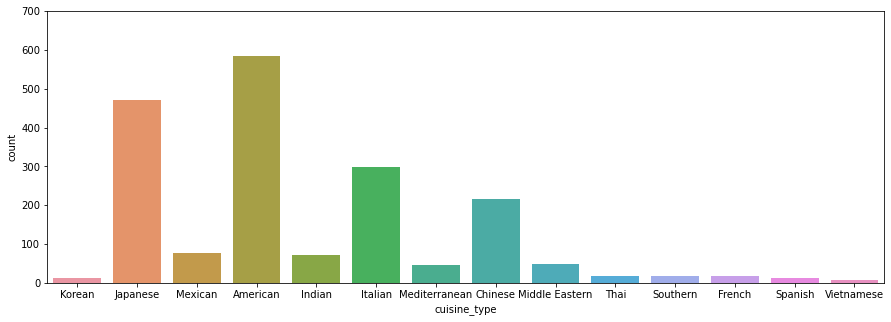

In [9]:
plt.figure(figsize = (15,5))
plt.ylim(0,700)
sns.countplot(data = df, x = 'cuisine_type'); # Countplot for cuisine type

### Observation
- American Cuisines are ordered the most followed by Japanese and Italian

## Cost of the Oder

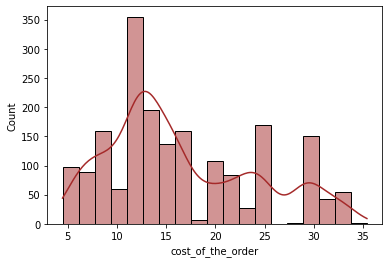

In [10]:
sns.histplot(data=df,x='cost_of_the_order',kde=True, color= 'brown')#Histogram for cost of the order
plt.show()

### Observation
- Cost of the order is right skewed with maximum order below 15 dollars

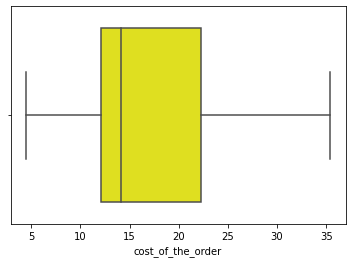

In [11]:
sns.boxplot(data=df,x='cost_of_the_order', color= 'yellow') # Boxplot for the cost of order
plt.show() 

### Observation
- From the box plot it is clear that cost of order is righ skewed without any outliers
- Maximum cost of the order was 35 dollars

# Day of the week

In [12]:
df['day_of_the_week'].unique() #To find unique values in the day of the week column

array(['Weekend', 'Weekday'], dtype=object)

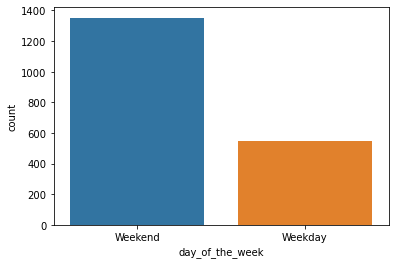

In [13]:
sns.countplot(data = df, x = 'day_of_the_week');#count plot for number of orders on day weekdays and weekends

### Observation
- Most of the orders are placed on weekends

# Preparation Time

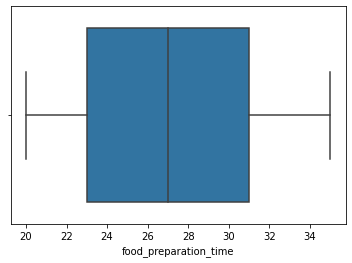

In [14]:
sns.boxplot(data=df,x='food_preparation_time') #boxplot for food preparation time
plt.show()

### Observation
- It takes around 27 minutes on an average to prepare food with an IQR of around 8

## Rating

In [15]:
df['rating'].unique() # to find what are the values for the column rating

array(['Not given', '5', '3', '4'], dtype=object)

In [16]:
df['rating'].value_counts()  # To find the number of times each value is repeated

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

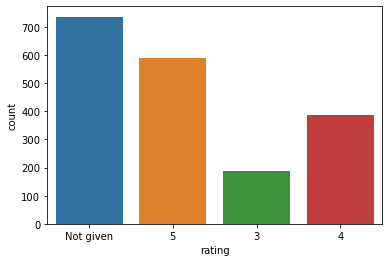

In [17]:
sns.countplot(data = df, x = 'rating'); # countplot for various rating

### Observation
- Ratings are Not given by majority of the customers

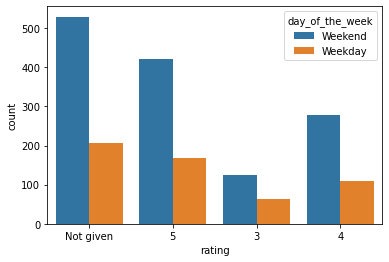

In [18]:
sns.countplot(data = df, x = 'rating', hue='day_of_the_week'); #Comparison of rating provided by customers on weekdays and weekends

### Observation
- Most of the customers provides ratings on weekends

In [19]:
df1['rating'] = df1['rating'].replace(['Not given'],np.nan) # Replacing Not given with nan to change the datatype

df1['rating'] = df1['rating'].astype(float) #Changing the data type to float to find the mean rating

In [20]:
df1.info() # To confirm the data type is changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [21]:
round(df1['rating'].mean(),2) # Now finding mean rating and rounding of it to 2 decimal places

4.34

### Observation
- Neglecting the Not given data it is seen that overall rating of the restaurants in the application in 4.34

# Delivery Time

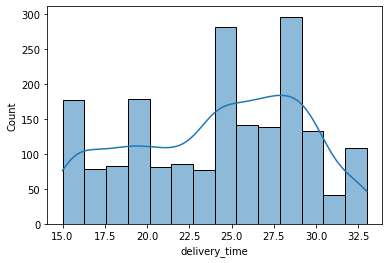

In [22]:
sns.histplot(data=df,x='delivery_time',kde=True)  #Histogram for delivery time
plt.show();

### Observation
- From the KDE it is clear that data is left skewed. ie it takes more delivery time

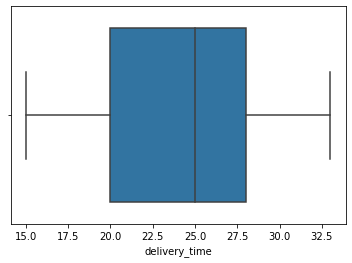

24.16

In [23]:
sns.boxplot(data=df,x='delivery_time') # Boxplot for delivery time
plt.show()
round(df['delivery_time'].mean(),2) # Finding the mean delivery time

### Observations
-Average delivery time is 24 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [24]:
print('Top 5 Restaurants are :')
df['restaurant_name'].value_counts()[:5].sort_values(ascending=False)  # To find the top 5 restaurants which has got maximum ratings

Top 5 Restaurants are :


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [25]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()[:3].sort_values(ascending=False) # TO find top 3 cuisines on weekend

American    415
Japanese    335
Italian     207
Name: cuisine_type, dtype: int64

#### Observations:
- American is the most popular cuisine type on weekends followed by Japanese and Italian

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
df_greater_than_20 = df[df['cost_of_the_order']>20] #Finding cost of order greater than 20 and storing it in a variable
print('Number of orders that cost above 20 dollars is:', df_greater_than_20.shape[0])#This will give the number of rows in the gerater than 20

Number of orders that cost above 20 dollars is: 555


In [27]:
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100 # Cost of order above 20 dollars is divided by total number of orders and multiplied by 100 

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

Percentage of orders above 20 dollars: 29.24 %


#### Observations:
- Percentage of orders above 20 dollars: 29.24 %

### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
mean_deltime=df['delivery_time'].mean() # To find the mean delivery time
print('The mean order delivery time is', round(mean_deltime, 2), 'minutes')

The mean order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [29]:
df['customer_id'].value_counts().head(3) #To find the frequent customer id

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Maximum order were placed by customer id's 52832, 47440 and 83287 with number of orders 13, 10 and 9 respectively

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Cuisine vs Cost of the order

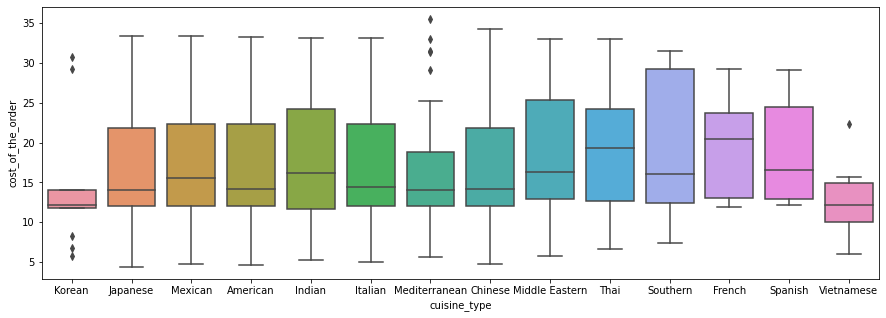

In [30]:
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'cuisine_type',y='cost_of_the_order');

### Observation
- Korean Mediterranean and Vietnamese cost of orders have outliers
- French and spanish cuisines are expensive

### Cuisine vs Food Preparation time

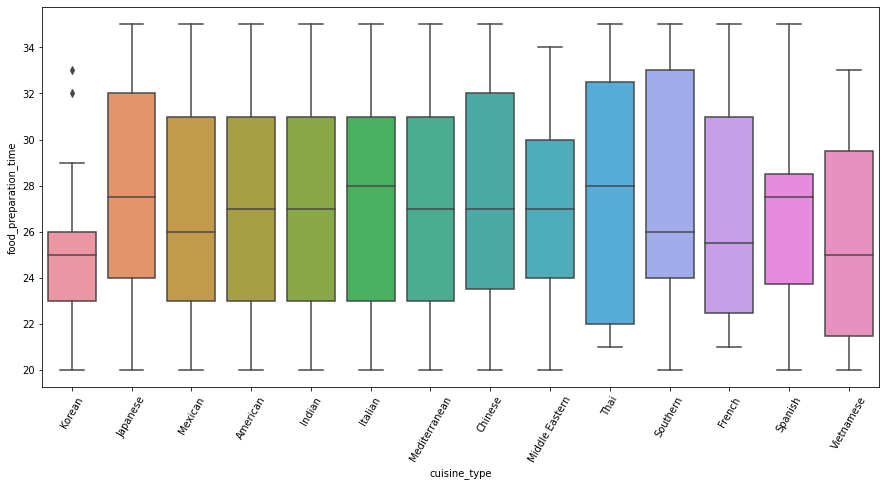

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')
plt.xticks(rotation = 60)
plt.show()

### Observation
- From the above boxplot it is clear that food preparation time remains almost the same for all the cusines
- Korean Cusines takes comparitively less time. However there are outliers

### Day of the Week vs Delivery time

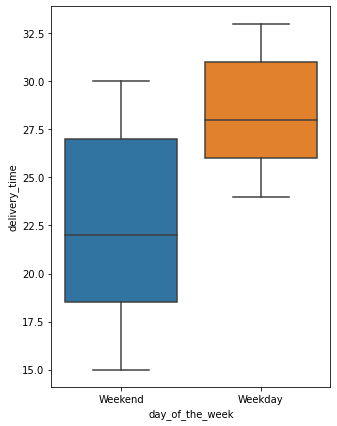

In [32]:
plt.figure(figsize=(5,7))
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time') 
plt.show()

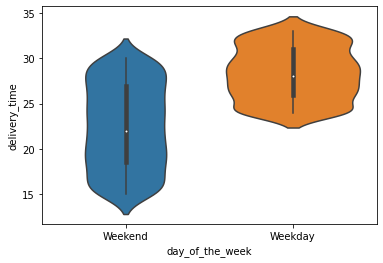

In [33]:
sns.violinplot(data=df, x='day_of_the_week', y='delivery_time', orient='v');

### Observation
- From the boxplot and violin plot it is clear that delivery time is more on weekdays
- From the body of the violin plot it is clear that probabilty of orders to be delayed is more

<Figure size 1440x720 with 0 Axes>

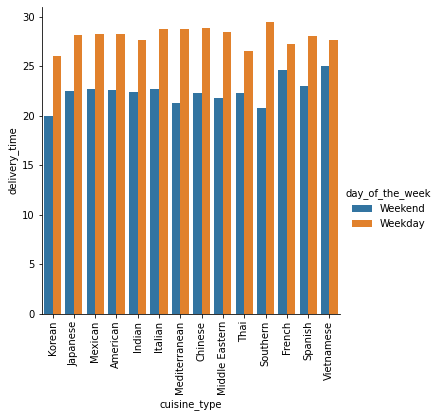

In [34]:
# Delivery time for various cuisines based on day of the week
plt.figure(figsize=(20,10))
sns.catplot(data=df,x='cuisine_type',y='delivery_time',hue='day_of_the_week',kind='bar',ci=False)
plt.xticks(rotation=90)
plt.show()

### Observation
- Irrespective of the type of cuisine delivery time is more than weekends
- Southern cuisines are taking more time to get delivered on weekdays

### Rating vs Delivery time

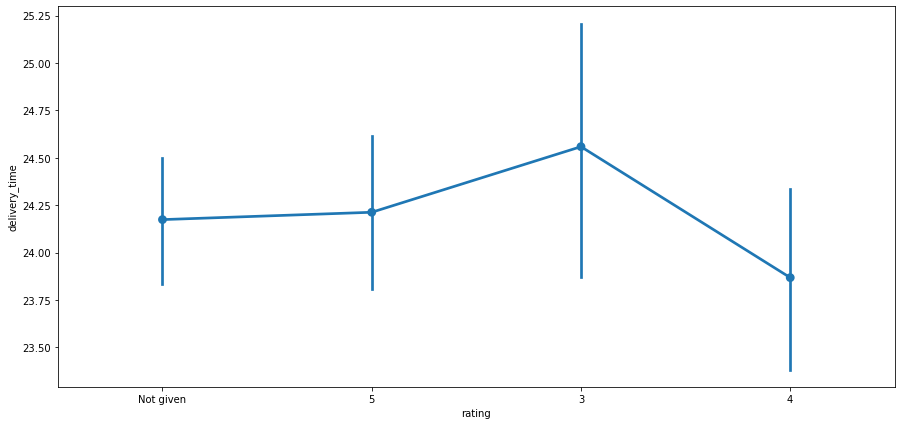

In [35]:
plt.figure(figsize=(15, 7))
sns.pointplot(data=df,x = 'rating', y = 'delivery_time')
plt.show()

### Observation
- As delivery time increases rating decreases

### Rating vs Food preparation time

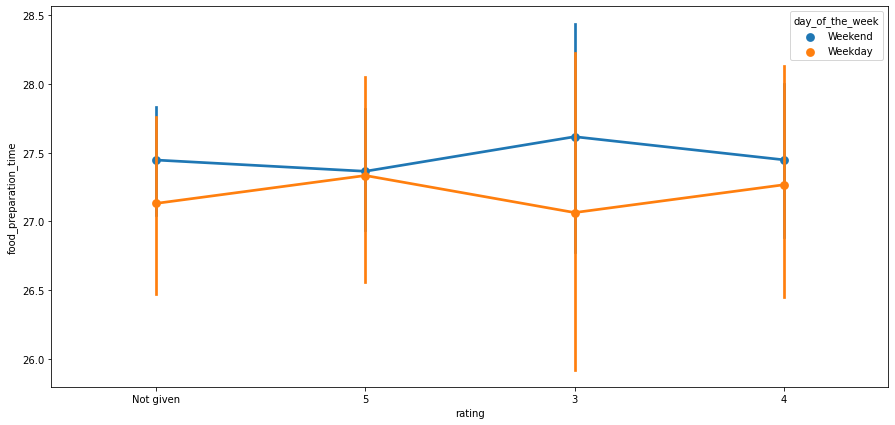

In [36]:
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x = 'rating', y = 'food_preparation_time',hue='day_of_the_week')
plt.show()

### Observation
- Faster the food is prepared the rating is more.
- On Weekends and weekdays 5 and 4 rated cuuisines doesnt have much variations. However, it is more when rating decreases
- Confidence interval for cuisines rated 3 is more

In [37]:
# Catagorizing prepration time into Fast, Moderate and slow
df['PrepTime_bins'] = pd.cut(df['food_preparation_time'],bins=[0,15,30,45],labels=['Fast','Moderate','Slow'], right = False)
df.head()
df['PrepTime_bins'].value_counts().sort_values(ascending = False)

Moderate    1202
Slow         696
Fast           0
Name: PrepTime_bins, dtype: int64

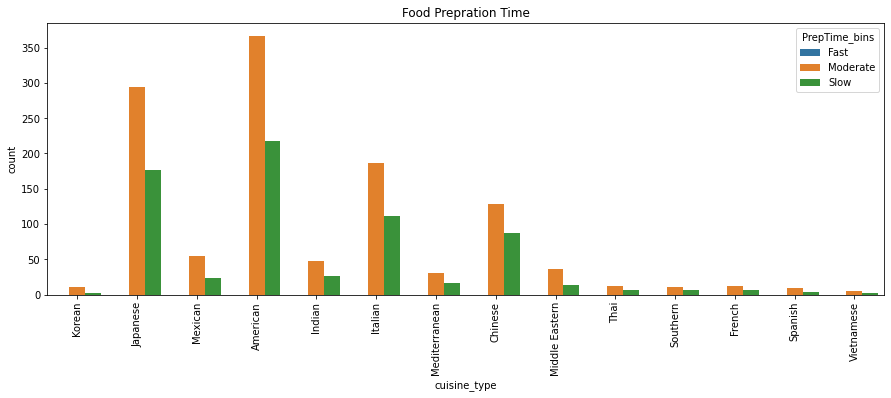

In [38]:
# Catagorized preration time vs count
plt.figure(figsize = (15,5))
plt.title('Food Prepration Time')
sns.countplot(data = df,x='cuisine_type',hue='PrepTime_bins');
plt.xticks(rotation=90);

### Observation
- There are no food items that could be prepare under 15 minutes
- Most of the food take around 15 to 30 minutes for preparation
- Most of the order for American food can be prepared in 15 to 30 minutes

### Rating vs Cost of the order

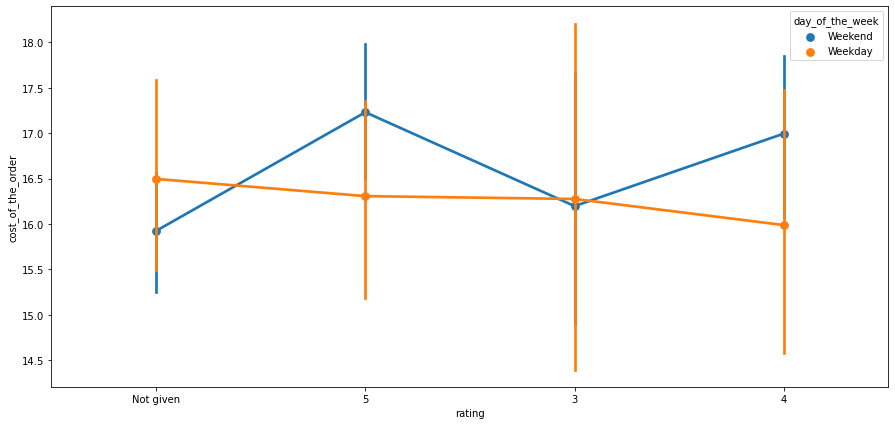

In [39]:
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x = 'rating', y ='cost_of_the_order',hue='day_of_the_week')
plt.show()

### Observation
- Costly order  placed on weekends are rated more

### Correlation among variables

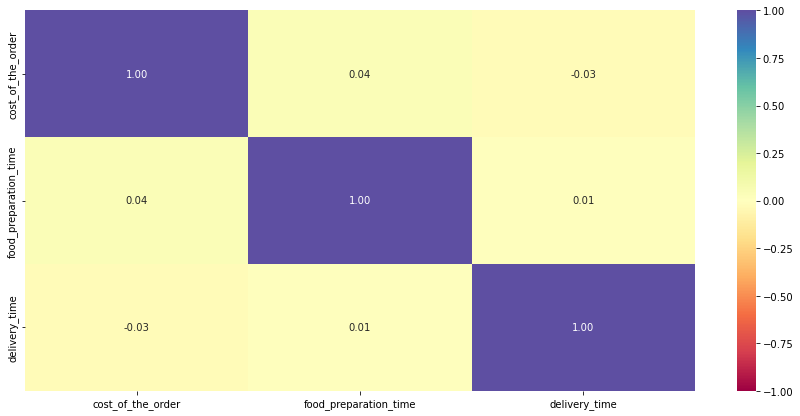

In [40]:
# heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observation
- There is a negative corelation between cost of the order and delivery time
- There is a slight positive corelation between cost of the order and food preparation time

<AxesSubplot:xlabel='cuisine_type', ylabel='cost_of_the_order'>

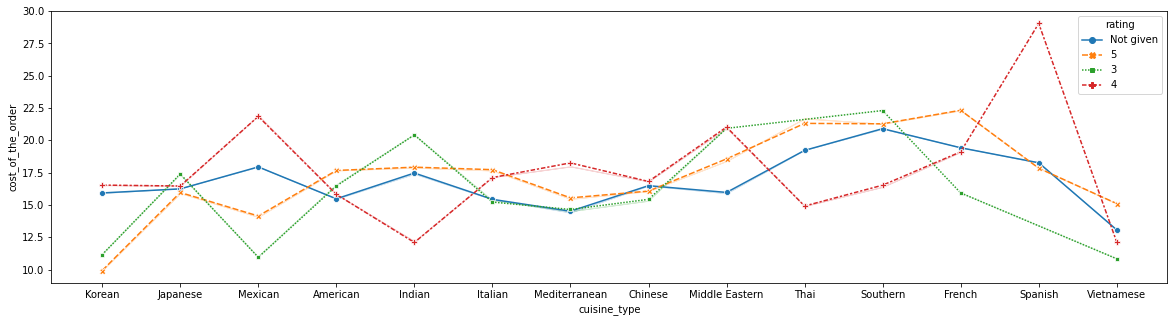

In [41]:
#Based on total cost of the order how does the rating varies across cuisine type
plt.figure(figsize = (20,5))
sns.lineplot(data = df , y = 'cost_of_the_order' , x = 'cuisine_type',ci=False,hue='rating',style="rating",markers = True)

### Observation
- Korean cuisines of less than 10 dollars got good ratings
- Spanish cuisines has ratings only above 4 irrespective of more price

<AxesSubplot:xlabel='cuisine_type', ylabel='total_time'>

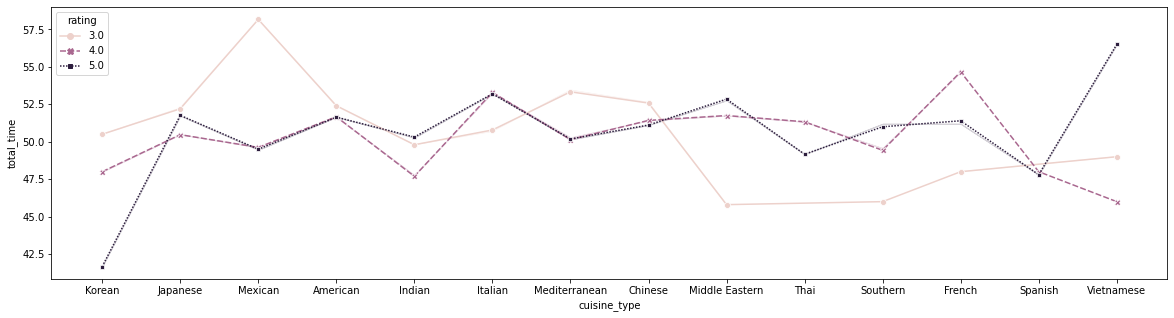

In [42]:
#Based on total time of the order how does the rating varies across cuisine type
df1['total_time'] = df1['food_preparation_time'] + df1['delivery_time']
plt.figure(figsize = (20,5))
sns.lineplot(data = df1 , y = 'total_time' , x = 'cuisine_type',ci=False,hue='rating',style="rating",markers = True)

### Observation
- Korean cuisisnes have the best rating when the total time is less
- Mexican cuisines, when took more time  they were rated less
- Middle eastern, Southern and French were rated less when they took less time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [43]:
df_rated = df[df['rating'] != 'Not given'].copy()# Filter the rated restaurants

In [44]:
df_rated['rating'] = df_rated['rating'].astype('int') # Changing the data type of the column

In [45]:
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()# A new data frame is created with rating count and arranged in descending order
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [46]:
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] # To find restaurant names with rating count greater than 50
rest_names

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [47]:
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy() # creating a copy of the data frame if the restaurant name is there in the above created datafram column where count of the restaurant is above 50 

In [48]:
df_mean_4.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,PrepTime_bins
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.2,Weekend,3,25,15,Moderate
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.3,Weekend,5,23,17,Moderate
15,1477414,66222,Shake Shack,American,16.2,Weekend,5,33,25,Slow
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.2,Weekend,4,35,26,Slow
22,1478287,150599,Shake Shack,American,29.1,Weekday,5,21,30,Moderate


In [49]:
round(mean_deltime, 2)

24.16

In [50]:
print('Restaurants with rating count more than 50 and average rating above 4 are \n')
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() # Finding mean of the rating column and sorting the column

Restaurants with rating count more than 50 and average rating above 4 are 



,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations
The Meat Ball restaurant, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi are the top restaurants with rating count above 50 and mean average above 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [51]:
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) #function to determine the revenue
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,PrepTime_bins,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,Moderate,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,Moderate,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Moderate,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,Moderate,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,Moderate,1.7385


In [52]:
NetRevenue=df['Revenue'].sum() # to get the total revenue 
print('The Net Revenue generated by the company is ',round(NetRevenue, 2),'dollars')

The Net Revenue generated by the company is  6166.3 dollars


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [53]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time'] # Calculate total delivery time and add a new column to the dataframe df to store the total delivery time

df_greater_than_60 = df[df['total_time']>60]
print('Number of orders that takes more than 60 minutes are:', df_greater_than_60.shape[0])# to find umber of orders that takes more than 60 minutes

Number of orders that takes more than 60 minutes are: 200


In [54]:
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100 # To find the percentage of orders that takes more than 60 minutes

print(round(percentage, 2),'% of the order takes more than 60 minutes to get delivered')

10.54 % of the order takes more than 60 minutes to get delivered


#### Observations:
Total time required greater than 60 minutes is for 200 orders and it is 10.54% of the total orders

In [55]:
top10=df.groupby(['restaurant_name','cuisine_type'])[['food_preparation_time','delivery_time']].mean() # To find mean preparation and delivery time
top10

,,food_preparation_time,delivery_time
restaurant_name,cuisine_type,,
'wichcraft,American,28.000000,28.000000
12 Chairs,Middle Eastern,27.000000,27.750000
5 Napkin Burger,American,30.200000,24.400000
67 Burger,American,20.000000,28.000000
Alidoro,American,34.000000,22.000000
...,...,...,...
Zero Otto Nove,Italian,30.000000,21.500000
brgr,American,25.000000,25.000000
da Umberto,Italian,24.333333,28.000000


In [56]:
top10['Total_time']=top10['food_preparation_time']+top10['delivery_time'] #Finding the total time and adding column to the data frame

In [57]:
top10.sort_values(['Total_time'],ascending = False).head(10) #displaying it in descending order

,,food_preparation_time,delivery_time,Total_time
restaurant_name,cuisine_type,,,
Taro Sushi,Japanese,35.0,32.00,67.00
Cipriani Le Specialita,Italian,35.0,30.00,65.00
Il Bambino,Italian,34.0,29.00,63.00
Sushi Choshi,Japanese,35.0,27.00,62.00
Big Wong Restaurant _¤¾Ñ¼,Chinese,34.0,28.00,62.00
Crema Restaurante,Mexican,31.0,30.00,61.00
Grand Sichuan International,Chinese,31.0,29.25,60.25
Mira Sushi,Japanese,32.5,27.50,60.00
Hot Kitchen,Chinese,33.0,26.50,59.50


### Observation
Taro Sushi is restuarant that takes around 67 minutes for prepration and delivery of Japanese Cuisine

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),'minutes') # To get the mean delivery time on weekdays 

In [ ]:
print('The mean delivery time on weekend is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),'minutes')# To get the mean delivery time on weekdays

#### Observations:
The mean delivery time on weekday is 28 minutes and on weekend is 22 minutes

### Observation
Taro Sushi is restuarant that takes around 67 minutes for prepration and delivery of Japanese Cuisine

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- American Cuisines has the maximum orders 
- Majority of the people prefer food that cost below 15 dollars
- Most of the orders were placed on weekends
- Shake Shack  has got majority of the order
- Mean delivery time is 28 minute on weekdays and 22 minute 28 on weekends
- Ratings are provided by the user mainly on weekends

### Recommendations:
* Increase the number of hotels where american cusines are served
* If food cost is below 15 dollars, more number of orders will be there
* Need to ensure faster delivery on weekdays.
* Maximum orders are recieved on weekends. Make sure delivery time should be minimised.
* Need to make the feedback survey more attractive so that more customers rate the orders. This will help to make the model with more accuracy